This will be a Data Analysis on a OpenPowerlifting dataset given by Kaggle. We will look at how the dataset is formulated, summarize a lot of the dataset, and create some graphs. The main purpose of this Notebook is to answer the following question:

__Which lift contributes the most to a higher Wilks score?__

First a wilks metric is a metric used to determine in most competitions the overall better lifter. A higher wilks score will determine the better lifter regardless of weight class

In [4]:
import seaborn 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
powerlifting_data = pd.read_csv("C:/Users/zeroc/OneDrive/Desktop/PortfolioProjects/Fitnessdata/openpowerlifting.csv")

print(powerlifting_data.columns.to_list())

C:\Users\zeroc\AppData\Local\Temp\ipykernel_6752\621257948.py:1: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  powerlifting_data = pd.read_csv("C:/Users/zeroc/OneDrive/Desktop/PortfolioProjects/Fitnessdata/openpowerlifting.csv")


['Name', 'Sex', 'Event', 'Equipment', 'Age', 'AgeClass', 'Division', 'BodyweightKg', 'WeightClassKg', 'Squat1Kg', 'Squat2Kg', 'Squat3Kg', 'Squat4Kg', 'Best3SquatKg', 'Bench1Kg', 'Bench2Kg', 'Bench3Kg', 'Bench4Kg', 'Best3BenchKg', 'Deadlift1Kg', 'Deadlift2Kg', 'Deadlift3Kg', 'Deadlift4Kg', 'Best3DeadliftKg', 'TotalKg', 'Place', 'Wilks', 'McCulloch', 'Glossbrenner', 'IPFPoints', 'Tested', 'Country', 'Federation', 'Date', 'MeetCountry', 'MeetState', 'MeetName']


The first thing we need to look at is how the lifters are divided by Sex, Event, Equipment, Age, Age Class, Division, and Weight class. First, I want to see if these proposed columns have discrete values, which by common sense thet should. 

In [6]:
print(powerlifting_data["Sex"].value_counts())

M    1060189
F     363165
Name: Sex, dtype: int64


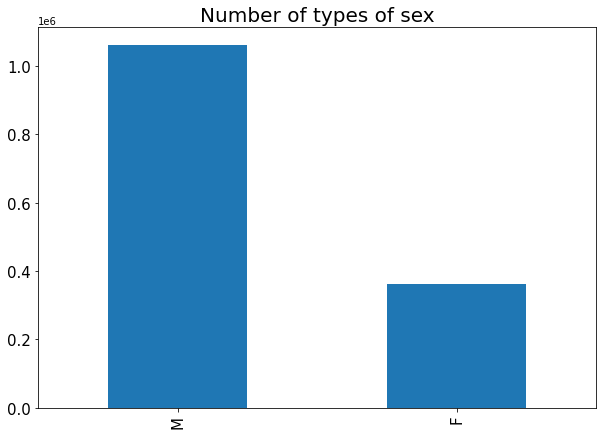

In [7]:
#Bar graph for number of genders
plt.figure(figsize = (10,7))
powerlifting_data["Sex"].value_counts().plot.bar()
plt.title("Number of types of sex", fontsize = 20)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.show()

In [8]:
print(powerlifting_data["Event"].value_counts())

SBD    1073237
B       257179
D        56717
BD       27598
S         4900
SB        2371
SD        1352
Name: Event, dtype: int64


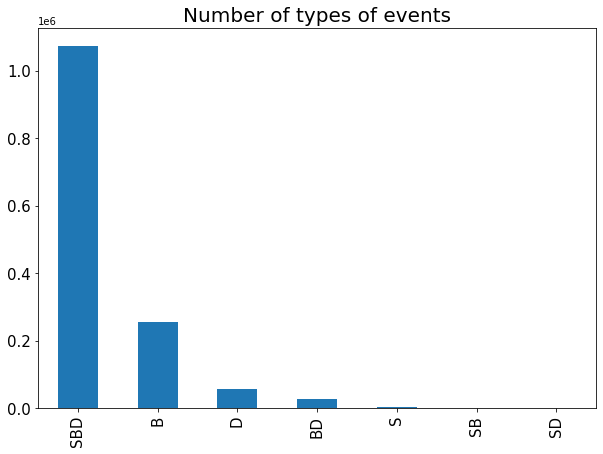

In [9]:
#Bar graph for number of events
plt.figure(figsize = (10,7))
powerlifting_data["Event"].value_counts().plot.bar()
plt.title("Number of types of events", fontsize = 20)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.show()

In [10]:
print(powerlifting_data["Equipment"].value_counts())

Single-ply    787141
Raw           467421
Wraps         103739
Multi-ply      65035
Straps            18
Name: Equipment, dtype: int64


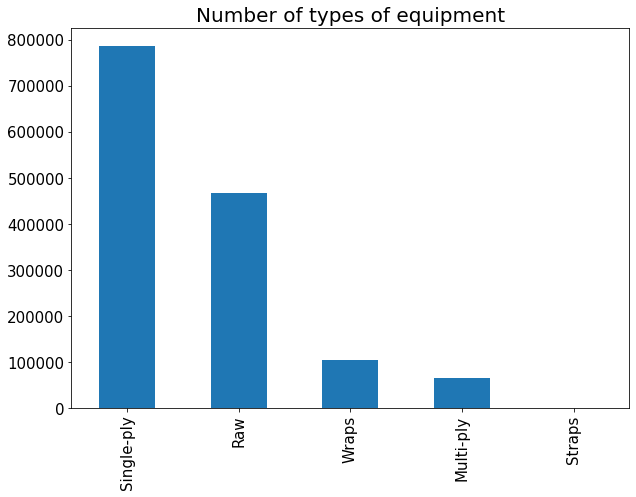

In [11]:
#Bar graph for number of equipments
plt.figure(figsize = (10,7))
powerlifting_data["Equipment"].value_counts().plot.bar()
plt.title("Number of types of equipment", fontsize = 20)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.show()

In [12]:
print(powerlifting_data["AgeClass"].value_counts())

24-34     244197
20-23     136701
35-39      66258
18-19      64024
40-44      63917
16-17      46165
45-49      45746
50-54      36031
13-15      25640
55-59      21930
60-64      15384
65-69       8650
70-74       5807
5-12        2779
75-79       2474
80-999      1097
Name: AgeClass, dtype: int64


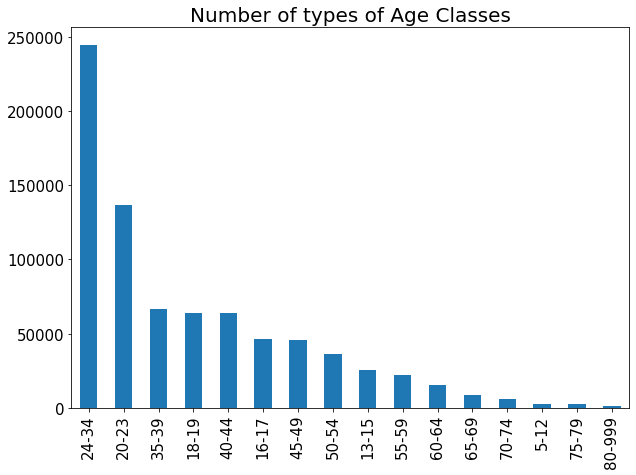

In [13]:
#Bar graph for number of age classes
plt.figure(figsize = (10,7))
powerlifting_data["AgeClass"].value_counts().plot.bar()
plt.title("Number of types of Age Classes", fontsize = 20)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.show()

In [14]:
print(powerlifting_data["WeightClassKg"].value_counts())

90      103156
75       97147
100      94964
82.5     87547
110      69703
         ...  
79.5         1
78.5         1
76.5         1
75.5         1
160          1
Name: WeightClassKg, Length: 224, dtype: int64


In [15]:
print(powerlifting_data["BodyweightKg"].value_counts())

90.00     23343
82.50     22385
75.00     21356
100.00    20497
67.50     17417
          ...  
132.66        1
79.71         1
105.86        1
132.29        1
190.78        1
Name: BodyweightKg, Length: 11956, dtype: int64


Obviously for clarity sake, we will not be showing a bar graph for the discrete values of Weight classes or Bodyweight. Obviously there are lot.

Now the previous data shown were all raw data. Therefore, some of the data has accounted for people twice. Or some of the data has values in which are continous. Hence, we must clean this data such that it will a workable discrete number of values. 
First, we must include lifters who perform in straps to also be in wraps. 

In [16]:
powerlifting_data["Equipment"] = powerlifting_data["Equipment"].replace(to_replace = "Straps", value="Wraps")

And to check such data works

Single-ply    787141
Raw           467421
Wraps         103757
Multi-ply      65035
Name: Equipment, dtype: int64


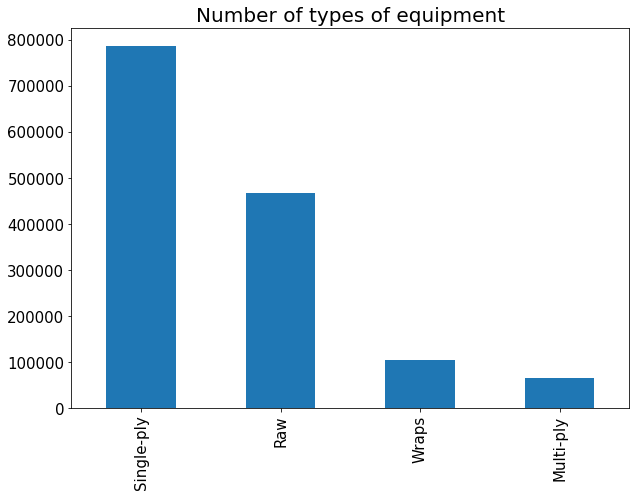

In [17]:
print(powerlifting_data["Equipment"].value_counts())
plt.figure(figsize = (10,7))
powerlifting_data["Equipment"].value_counts().plot.bar()
plt.title("Number of types of equipment", fontsize = 20)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.show()

Next I would like to reclassify everyone's age ranges such that everyone is placed in the correct age class since there are a lot of duplicate age classes. The age classes I am proposing would be the following which are the classes for the IPF:
- <18 : sub-junior
- 19 - 23 : junior
- 24 - 39 : open
- 40 - 49 : masters 1
- 50 - 59 : masters 2
- 60 - 69 : masters 3
- 70+ : masters 4

Note I didnt write a function because there were only 22 unique value counts

In [18]:
powerlifting_data["AgeClass"] = powerlifting_data["AgeClass"].replace(to_replace= "24-34", value= "open")
powerlifting_data["AgeClass"] = powerlifting_data["AgeClass"].replace(to_replace= "20-23", value= "junior")
powerlifting_data["AgeClass"] = powerlifting_data["AgeClass"].replace(to_replace= "35-39", value= "open")
powerlifting_data["AgeClass"] = powerlifting_data["AgeClass"].replace(to_replace= "18-19", value= "junior")
powerlifting_data["AgeClass"] = powerlifting_data["AgeClass"].replace(to_replace= "40-44", value= "masters 1")
powerlifting_data["AgeClass"] = powerlifting_data["AgeClass"].replace(to_replace= "16-17", value= "sub-junior")
powerlifting_data["AgeClass"] = powerlifting_data["AgeClass"].replace(to_replace= "45-49", value= "masters 1")
powerlifting_data["AgeClass"] = powerlifting_data["AgeClass"].replace(to_replace= "50-54", value= "masters 2")
powerlifting_data["AgeClass"] = powerlifting_data["AgeClass"].replace(to_replace= "13-15", value= "sub-junior")
powerlifting_data["AgeClass"] = powerlifting_data["AgeClass"].replace(to_replace= "55-59", value= "masters 2")
powerlifting_data["AgeClass"] = powerlifting_data["AgeClass"].replace(to_replace= "60-64", value= "masters 3")
powerlifting_data["AgeClass"] = powerlifting_data["AgeClass"].replace(to_replace= "65-69", value= "masters 3")
powerlifting_data["AgeClass"] = powerlifting_data["AgeClass"].replace(to_replace= "70-74", value= "masters 4")
powerlifting_data["AgeClass"] = powerlifting_data["AgeClass"].replace(to_replace= "5-12", value= "sub-junior")
powerlifting_data["AgeClass"] = powerlifting_data["AgeClass"].replace(to_replace= "75-79", value= "masters 4")
powerlifting_data["AgeClass"] = powerlifting_data["AgeClass"].replace(to_replace= "80-999", value= "masters 4")

open          310455
junior        200725
masters 1     109663
sub-junior     74584
masters 2      57961
masters 3      24034
masters 4       9378
Name: AgeClass, dtype: int64


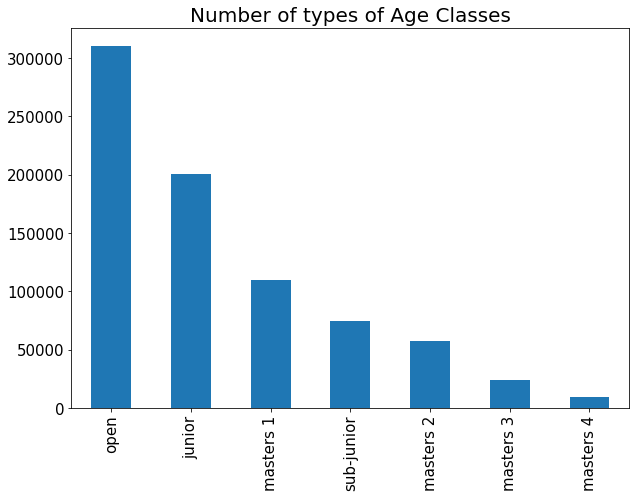

In [19]:
print(powerlifting_data["AgeClass"].value_counts())
plt.figure(figsize = (10,7))
powerlifting_data["AgeClass"].value_counts().plot.bar()
plt.title("Number of types of Age Classes", fontsize = 20)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.show()

First I need to separate the date into male and female. I also need to account for the type of equipment used. I will focus on raw lifting. I will also only look at lifters who did SBD events. 

In [20]:
male_data = powerlifting_data[powerlifting_data["Sex"] == "M"]
female_data = powerlifting_data[powerlifting_data["Sex"] == "F"]

male_data = male_data[male_data["Equipment"] == "Raw"]
female_data = female_data[female_data["Equipment"] == "Raw"]

male_data = male_data[male_data["Event"] == "SBD"]
female_data = female_data[female_data["Event"] == "SBD"]

Next I need to recategorize every lifters weight class because there are a lot of values for these. The IPF weight classes, which I will be using is as follows

For males:
- 59kg
- 66kg
- 74kg
- 83kg
- 93kg
- 105kg
- 120kg
- 120kg+

For females:
- 47kg
- 52kg
- 57kg
- 63kg
- 72kg
- 84kg
- 84kg+

In [21]:
male_data = male_data.sort_values("BodyweightKg")
female_data = female_data.sort_values("BodyweightKg")

Next I am going to delete the WeightClassKg feature and replace it my own that is standardized to the metric above. 

In [22]:
male_data = male_data.drop("WeightClassKg", axis= 1)
female_data = female_data.drop("WeightClassKg", axis= 1)

In [23]:
def maleweight(weight):
    if weight <= 59.0:
        return "59Kg"
    elif 59.0 < weight <= 66.0:
        return "66Kg"
    elif 66.0 < weight <= 74.0:
        return "74Kg"
    elif 74.0 < weight <= 83.0:
        return "83Kg"
    elif 83.0 < weight <=93.0:
        return "93Kg"
    elif 93.0 < weight <= 105.0:
        return "105Kg"
    elif 105.0 < weight <= 120.0:
        return "120Kg"
    elif weight > 120.0:
        return "120Kg+"
    else:
        return weight

maleweightclass = []
for weight in male_data["BodyweightKg"]:
    maleweightclass.append(maleweight(weight))

male_data.insert(8, "WeightClassKg", maleweightclass, True)

In [24]:
def femaleweight(weight):
    if weight <= 47:
        return "47Kg"
    elif 47 < weight <= 52:
        return "52Kg"
    elif 52 < weight <= 57:
        return "57Kg"
    elif 57 < weight <= 63:
        return "63Kg"
    elif 63 < weight <= 72:
        return "72Kg"
    elif 72 < weight <= 84:
        return "84Kg"
    elif weight > 84:
        return "84Kg+"
    else:
        return weight

womenweightclass = []
for weight in female_data["BodyweightKg"]:
    womenweightclass.append(femaleweight(weight))

female_data.insert(8, "WeightClassKg", womenweightclass, True)

Next we shall examine how the distribution of weightclasses and best squat, deadlifts, and bench were for each gender

c:\Users\zeroc\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 720x720 with 0 Axes>

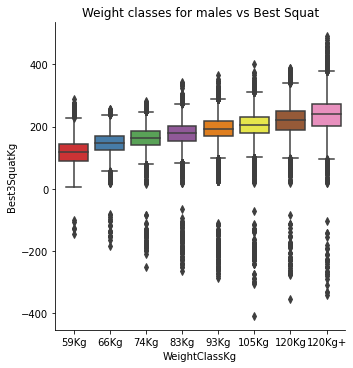

In [25]:
plt.figure(figsize= (10,10))
plt.tight_layout()
seaborn.catplot(x="WeightClassKg", y = "Best3SquatKg", kind= "box", data= male_data, palette= "Set1")
plt.title("Weight classes for males vs Best Squat")
plt.show()

Whoops forgot to note that negative best squats were failed attempts. Meaning that they bombed out in the squat. 

In [26]:
male_data[male_data["Best3SquatKg"] < 0] = 0
male_data[male_data["Best3BenchKg"] < 0] = 0
male_data[male_data["Best3DeadliftKg"] < 0] = 0

c:\Users\zeroc\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 720x720 with 0 Axes>

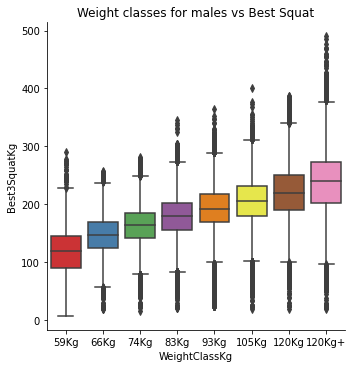

In [27]:
male_data["WeightClassKg"] = male_data["WeightClassKg"].dropna()
male_data["Best3SquatKg"] = male_data["Best3SquatKg"].dropna()
male_data = male_data[male_data["WeightClassKg"] != 0]
plt.figure(figsize= (10,10))
plt.tight_layout()
seaborn.catplot(x="WeightClassKg", y = "Best3SquatKg", kind= "box", data= male_data, palette= "Set1")
plt.title("Weight classes for males vs Best Squat")
plt.show()

c:\Users\zeroc\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 720x720 with 0 Axes>

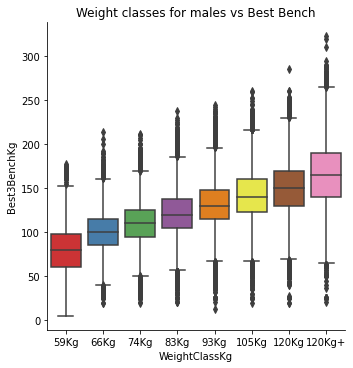

In [28]:
male_data["Best3BenchKg"] = male_data["Best3BenchKg"].dropna()
plt.figure(figsize= (10,10))
plt.tight_layout()
seaborn.catplot(x="WeightClassKg", y = "Best3BenchKg", kind= "box", data= male_data, palette= "Set1")
plt.title("Weight classes for males vs Best Bench")
plt.show()

c:\Users\zeroc\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 720x720 with 0 Axes>

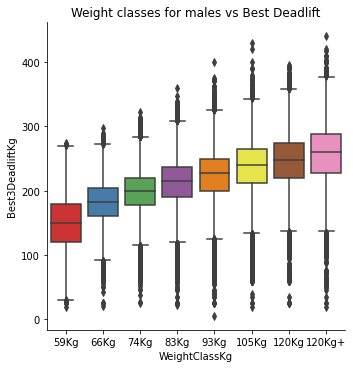

In [29]:
male_data["Best3DeadliftKg"] = male_data["Best3DeadliftKg"].dropna()
plt.figure(figsize= (10,10))
plt.tight_layout()
seaborn.catplot(x="WeightClassKg", y = "Best3DeadliftKg", kind= "box", data= male_data, palette= "Set1")
plt.title("Weight classes for males vs Best Deadlift")
plt.show()

In [30]:
female_data[female_data["Best3SquatKg"] < 0] = 0
female_data[female_data["Best3BenchKg"] < 0] = 0
female_data[female_data["Best3DeadliftKg"] < 0] = 0
female_data["WeightClassKg"] = female_data["WeightClassKg"].dropna()

c:\Users\zeroc\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 720x720 with 0 Axes>

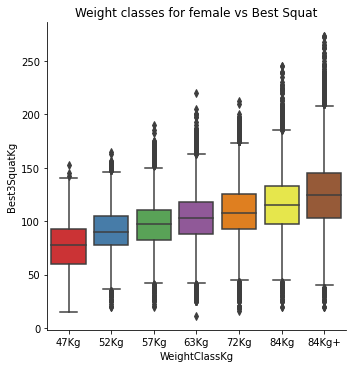

In [31]:
female_data = female_data[female_data["WeightClassKg"] != 0]
female_data["Best3SquatKg"] = female_data["Best3SquatKg"].dropna()
plt.figure(figsize= (10,10))
plt.tight_layout()
seaborn.catplot(x="WeightClassKg", y = "Best3SquatKg", kind= "box", data= female_data, palette= "Set1")
plt.title("Weight classes for female vs Best Squat")
plt.show()

c:\Users\zeroc\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 720x720 with 0 Axes>

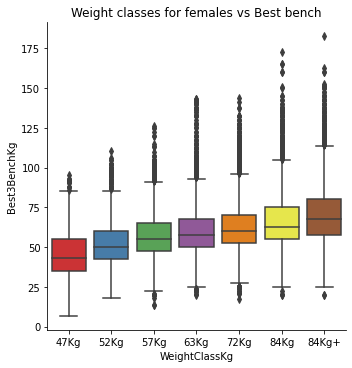

In [32]:
female_data["Best3BenchKg"] = female_data["Best3BenchKg"].dropna()
plt.figure(figsize= (10,10))
plt.tight_layout()
seaborn.catplot(x="WeightClassKg", y = "Best3BenchKg", kind= "box", data= female_data, palette= "Set1")
plt.title("Weight classes for females vs Best bench")
plt.show()

c:\Users\zeroc\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 720x720 with 0 Axes>

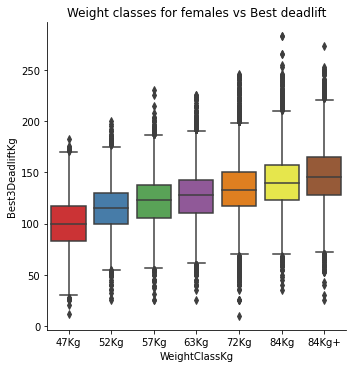

In [33]:
female_data["Best3DeadliftKg"] = female_data["Best3DeadliftKg"].dropna()
plt.figure(figsize= (10,10))
plt.tight_layout()
seaborn.catplot(x="WeightClassKg", y = "Best3DeadliftKg", kind= "box", data= female_data, palette= "Set1")
plt.title("Weight classes for females vs Best deadlift")
plt.show()

I  will now plot the Wilks metric against each of the best 3 lifts of each weight class

c:\Users\zeroc\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='Best3DeadliftKg', ylabel='Wilks'>

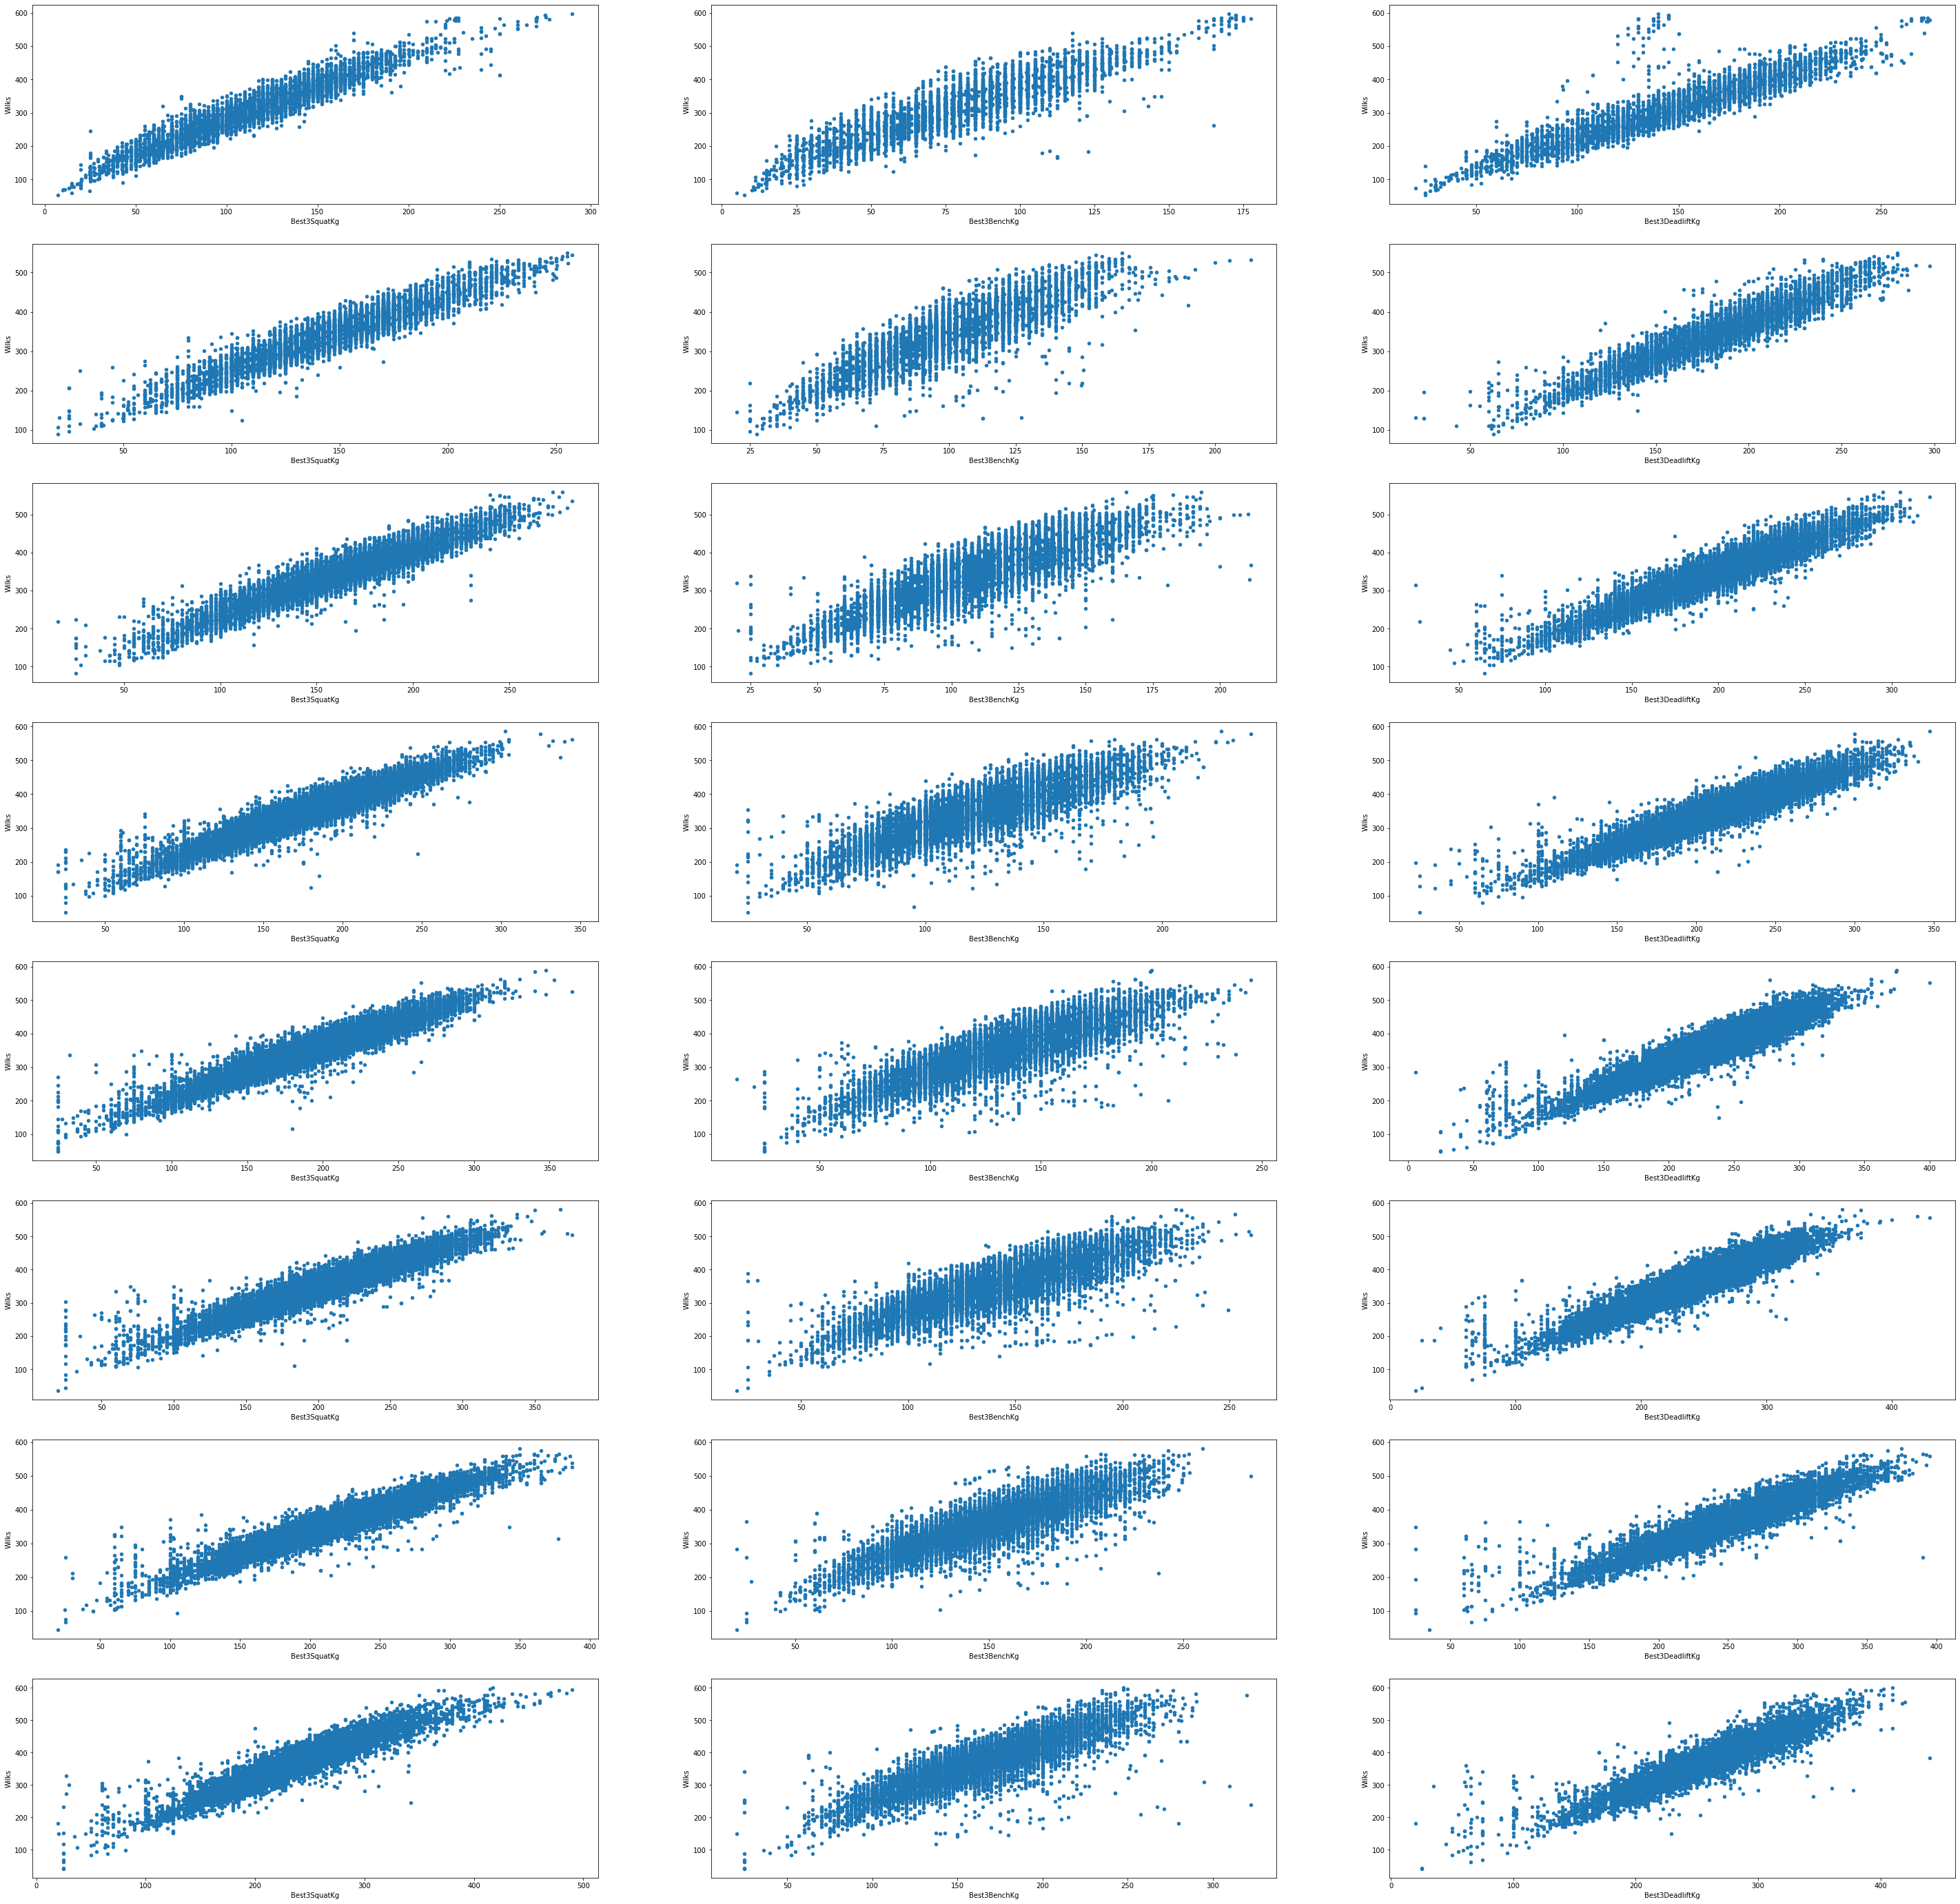

In [34]:
male_data["Wilks"] = male_data["Wilks"].dropna()

male_59 = male_data[male_data["WeightClassKg"] == "59Kg"]
male_66 = male_data[male_data["WeightClassKg"] == "66Kg"]
male_74 = male_data[male_data["WeightClassKg"] == "74Kg"]
male_83 = male_data[male_data["WeightClassKg"] == "83Kg"]
male_93 = male_data[male_data["WeightClassKg"] == "93Kg"]
male_105 = male_data[male_data["WeightClassKg"] == "105Kg"]
male_120 = male_data[male_data["WeightClassKg"] == "120Kg"]
male_120_plus = male_data[male_data["WeightClassKg"] == "120Kg+"]

fig, axes = plt.subplots(nrows = 8, ncols = 3, figsize = (50,50))
male_59.plot(x = "Best3SquatKg", y = "Wilks", kind = "scatter", ax = axes[0,0])
male_59.plot(x = "Best3BenchKg", y = "Wilks", kind = "scatter", ax = axes[0,1])
male_59.plot(x = "Best3DeadliftKg", y = "Wilks", kind = "scatter", ax = axes[0,2])

male_66.plot(x = "Best3SquatKg", y = "Wilks", kind = "scatter", ax = axes[1,0])
male_66.plot(x = "Best3BenchKg", y = "Wilks", kind = "scatter", ax = axes[1,1])
male_66.plot(x = "Best3DeadliftKg", y = "Wilks", kind = "scatter", ax = axes[1,2])

male_74.plot(x = "Best3SquatKg", y = "Wilks", kind = "scatter", ax = axes[2,0])
male_74.plot(x = "Best3BenchKg", y = "Wilks", kind = "scatter", ax = axes[2,1])
male_74.plot(x = "Best3DeadliftKg", y = "Wilks", kind = "scatter", ax = axes[2,2])

male_83.plot(x = "Best3SquatKg", y = "Wilks", kind = "scatter", ax = axes[3,0])
male_83.plot(x = "Best3BenchKg", y = "Wilks", kind = "scatter", ax = axes[3,1])
male_83.plot(x = "Best3DeadliftKg", y = "Wilks", kind = "scatter", ax = axes[3,2])

male_93.plot(x = "Best3SquatKg", y = "Wilks", kind = "scatter", ax = axes[4,0])
male_93.plot(x = "Best3BenchKg", y = "Wilks", kind = "scatter", ax = axes[4,1])
male_93.plot(x = "Best3DeadliftKg", y = "Wilks", kind = "scatter", ax = axes[4,2])

male_105.plot(x = "Best3SquatKg", y = "Wilks", kind = "scatter", ax = axes[5,0])
male_105.plot(x = "Best3BenchKg", y = "Wilks", kind = "scatter", ax = axes[5,1])
male_105.plot(x = "Best3DeadliftKg", y = "Wilks", kind = "scatter", ax = axes[5,2])

male_120.plot(x = "Best3SquatKg", y = "Wilks", kind = "scatter", ax = axes[6,0])
male_120.plot(x = "Best3BenchKg", y = "Wilks", kind = "scatter", ax = axes[6,1])
male_120.plot(x = "Best3DeadliftKg", y = "Wilks", kind = "scatter", ax = axes[6,2])

male_120_plus.plot(x = "Best3SquatKg", y = "Wilks", kind = "scatter", ax = axes[7,0])
male_120_plus.plot(x = "Best3BenchKg", y = "Wilks", kind = "scatter", ax = axes[7,1])
male_120_plus.plot(x = "Best3DeadliftKg", y = "Wilks", kind = "scatter", ax = axes[7,2])

<Axes: xlabel='Best3DeadliftKg', ylabel='Wilks'>

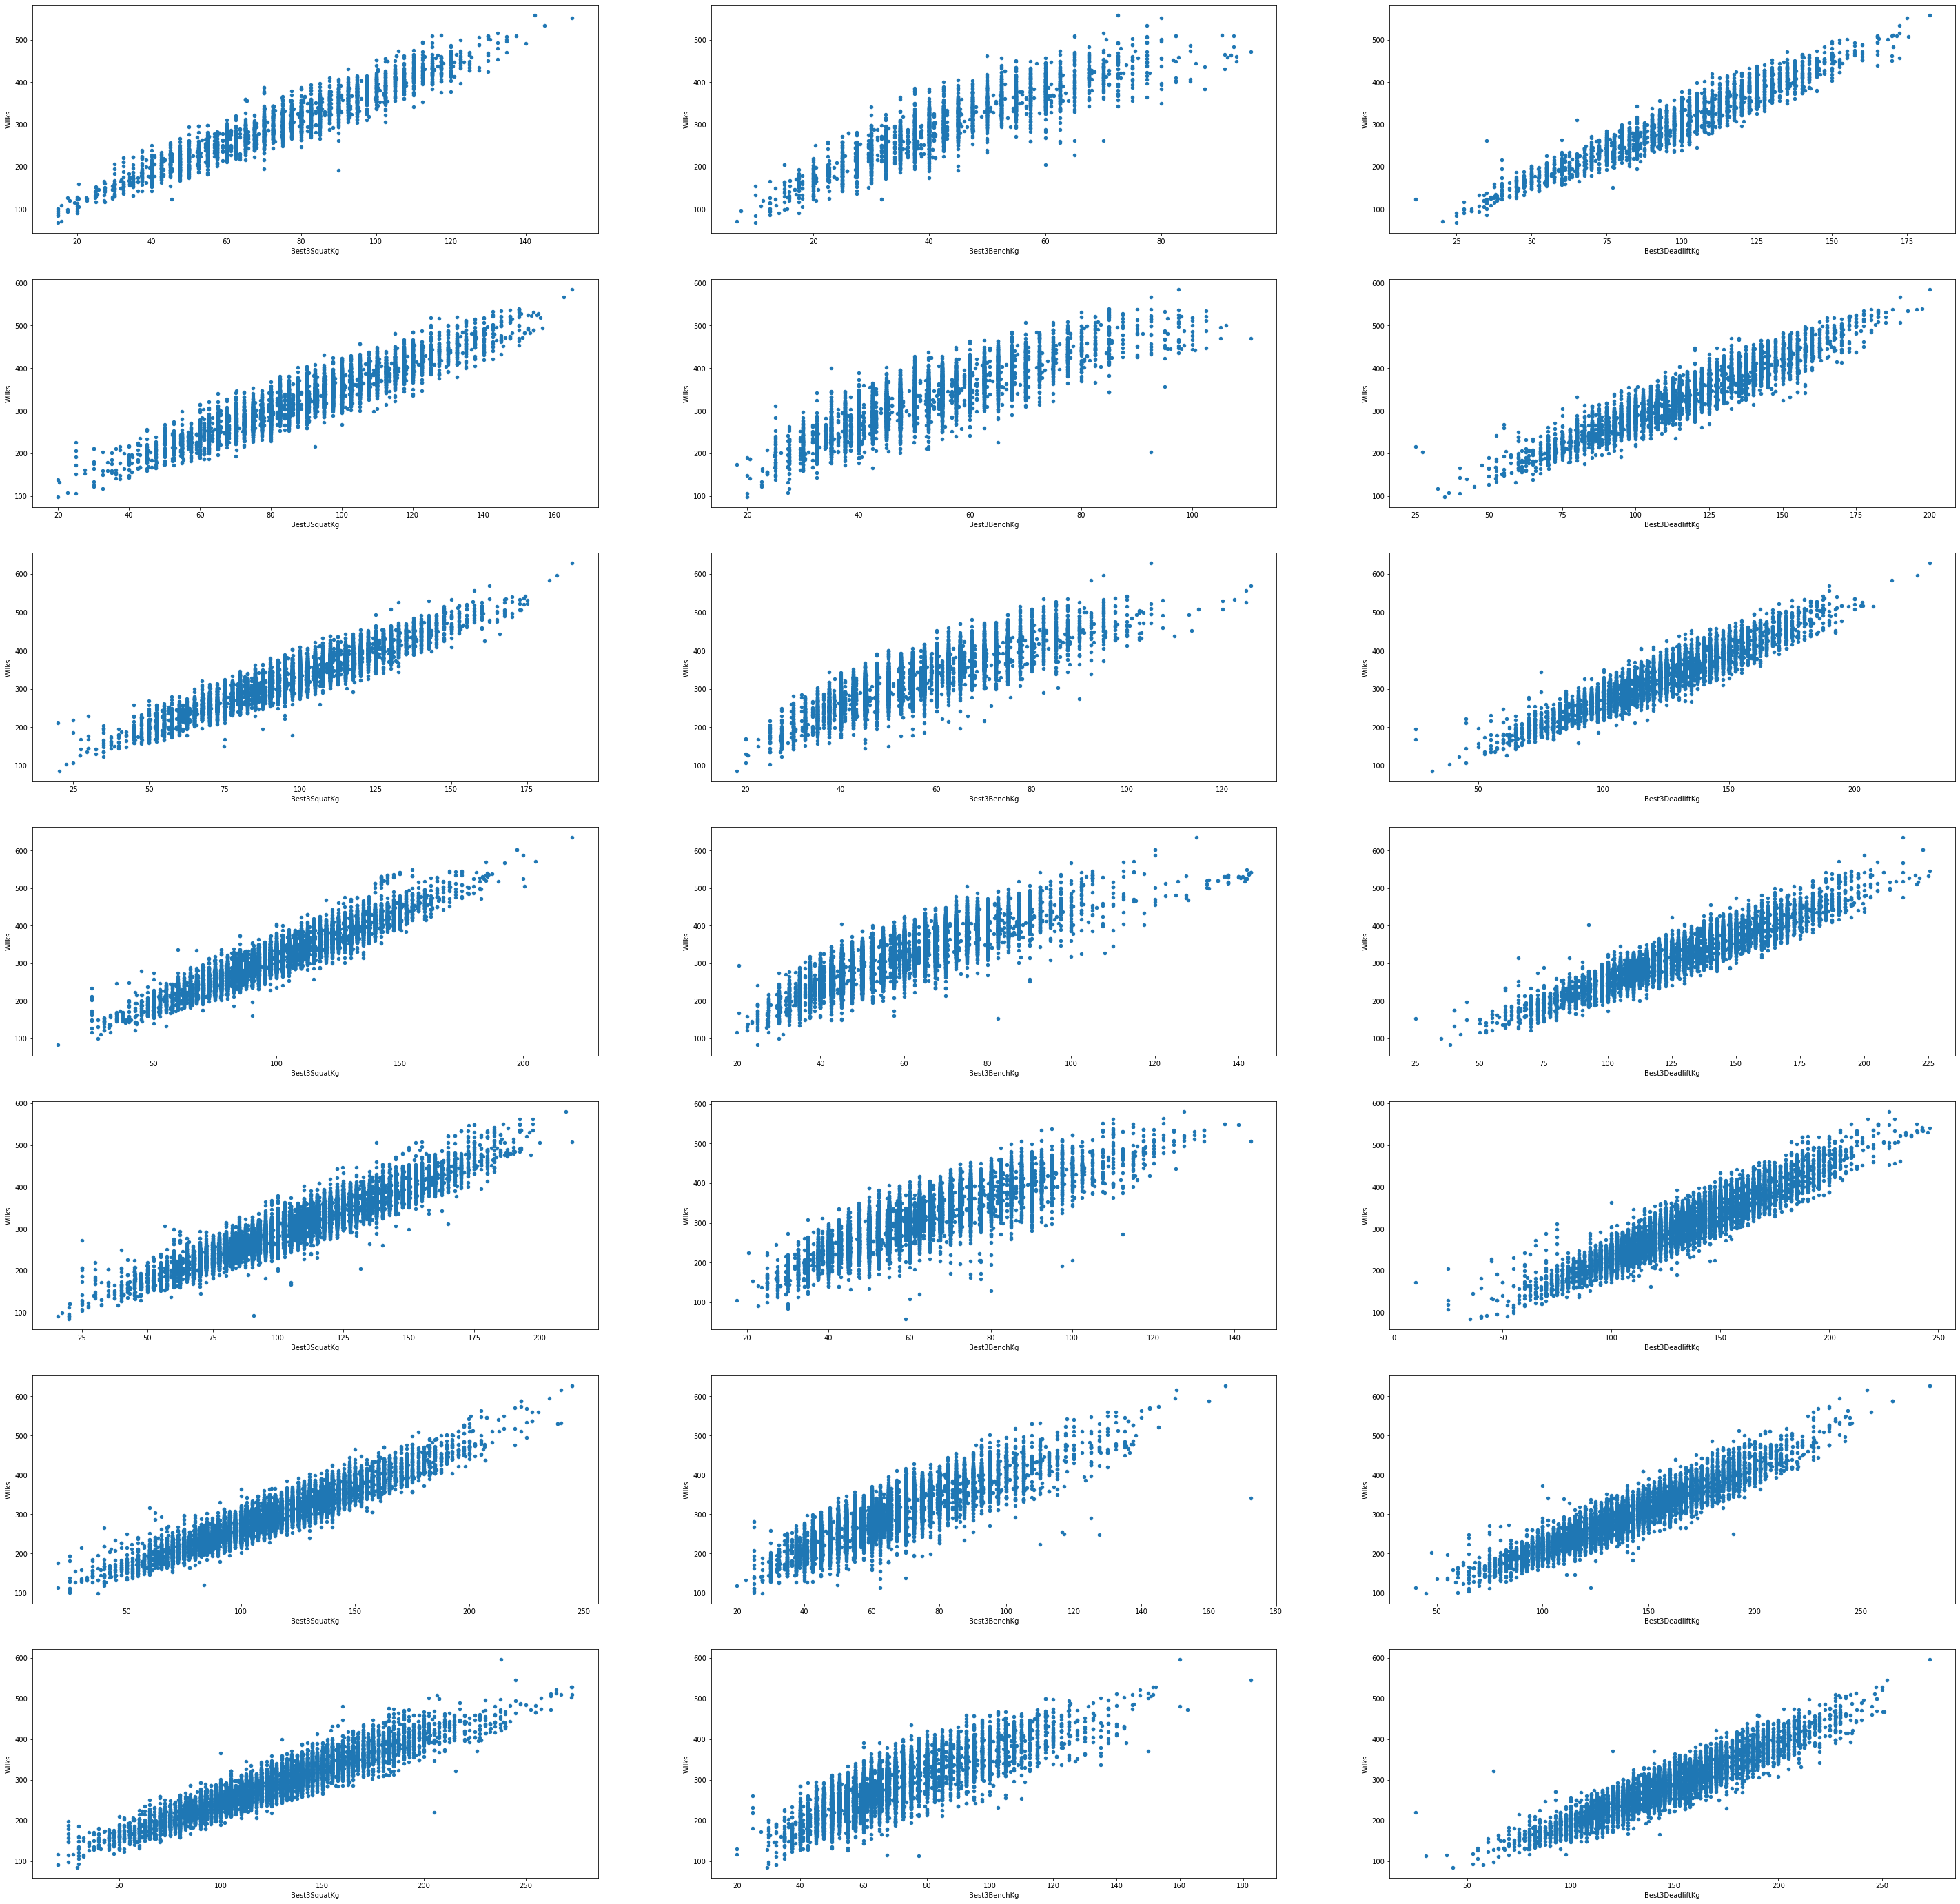

In [82]:
female_data["Wilks"] = female_data["Wilks"].dropna()

female_47 = female_data[female_data["WeightClassKg"] == "47Kg"]
female_52 = female_data[female_data["WeightClassKg"] == "52Kg"]
female_57 = female_data[female_data["WeightClassKg"] == "57Kg"]
female_63 = female_data[female_data["WeightClassKg"] == "63Kg"]
female_72 = female_data[female_data["WeightClassKg"] == "72Kg"]
female_84 = female_data[female_data["WeightClassKg"] == "84Kg"]
female_84_plus = female_data[female_data["WeightClassKg"] == "84Kg+"]

fig, axes = plt.subplots(nrows = 7, ncols = 3, figsize = (50,50))
female_47.plot(x = "Best3SquatKg", y = "Wilks", kind = "scatter", ax = axes[0,0])
female_47.plot(x = "Best3BenchKg", y = "Wilks", kind = "scatter", ax = axes[0,1])
female_47.plot(x = "Best3DeadliftKg", y = "Wilks", kind = "scatter", ax = axes[0,2])

female_52.plot(x = "Best3SquatKg", y = "Wilks", kind = "scatter", ax = axes[1,0])
female_52.plot(x = "Best3BenchKg", y = "Wilks", kind = "scatter", ax = axes[1,1])
female_52.plot(x = "Best3DeadliftKg", y = "Wilks", kind = "scatter", ax = axes[1,2])

female_57.plot(x = "Best3SquatKg", y = "Wilks", kind = "scatter", ax = axes[2,0])
female_57.plot(x = "Best3BenchKg", y = "Wilks", kind = "scatter", ax = axes[2,1])
female_57.plot(x = "Best3DeadliftKg", y = "Wilks", kind = "scatter", ax = axes[2,2])

female_63.plot(x = "Best3SquatKg", y = "Wilks", kind = "scatter", ax = axes[3,0])
female_63.plot(x = "Best3BenchKg", y = "Wilks", kind = "scatter", ax = axes[3,1])
female_63.plot(x = "Best3DeadliftKg", y = "Wilks", kind = "scatter", ax = axes[3,2])

female_72.plot(x = "Best3SquatKg", y = "Wilks", kind = "scatter", ax = axes[4,0])
female_72.plot(x = "Best3BenchKg", y = "Wilks", kind = "scatter", ax = axes[4,1])
female_72.plot(x = "Best3DeadliftKg", y = "Wilks", kind = "scatter", ax = axes[4,2])

female_84.plot(x = "Best3SquatKg", y = "Wilks", kind = "scatter", ax = axes[5,0])
female_84.plot(x = "Best3BenchKg", y = "Wilks", kind = "scatter", ax = axes[5,1])
female_84.plot(x = "Best3DeadliftKg", y = "Wilks", kind = "scatter", ax = axes[5,2])

female_84_plus.plot(x = "Best3SquatKg", y = "Wilks", kind = "scatter", ax = axes[6,0])
female_84_plus.plot(x = "Best3BenchKg", y = "Wilks", kind = "scatter", ax = axes[6,1])
female_84_plus.plot(x = "Best3DeadliftKg", y = "Wilks", kind = "scatter", ax = axes[6,2])

As we can see there seems to be a linear regression pattern in every subplot for every lifter in every weight class. Hence, we can try to find the line of best fit, and perhaps even run regression models and optimize said models. 

However, the Wilks metric doesn't take into account for the weight class. Hence, we can actually aggregate all of the lifts in each weight class into one giant plot like so

<Axes: xlabel='Best3DeadliftKg', ylabel='Wilks'>

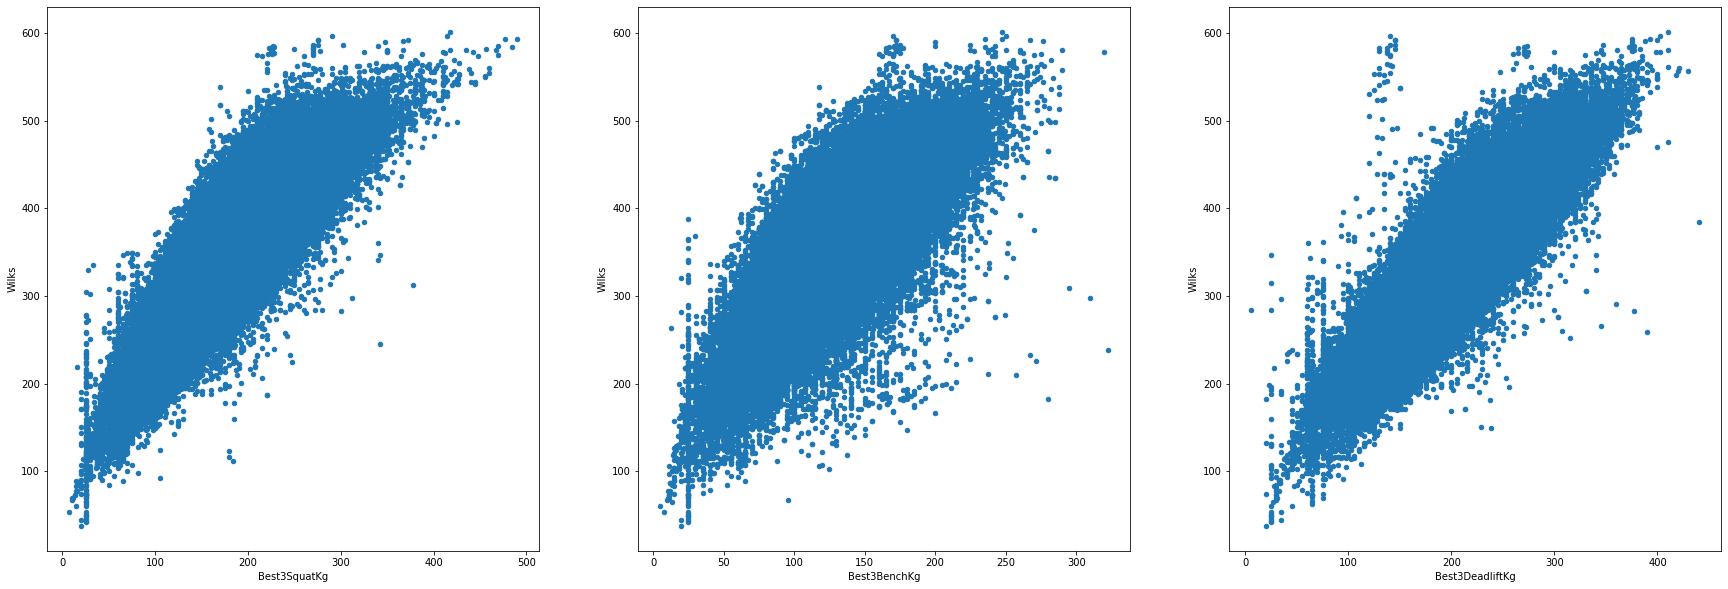

In [36]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (30,10))
male_data.plot(x = "Best3SquatKg", y = "Wilks", kind = "scatter", ax = axes[0])
male_data.plot(x = "Best3BenchKg", y = "Wilks", kind = "scatter", ax = axes[1])
male_data.plot(x = "Best3DeadliftKg", y = "Wilks", kind = "scatter", ax = axes[2])

<Axes: xlabel='Best3DeadliftKg', ylabel='Wilks'>

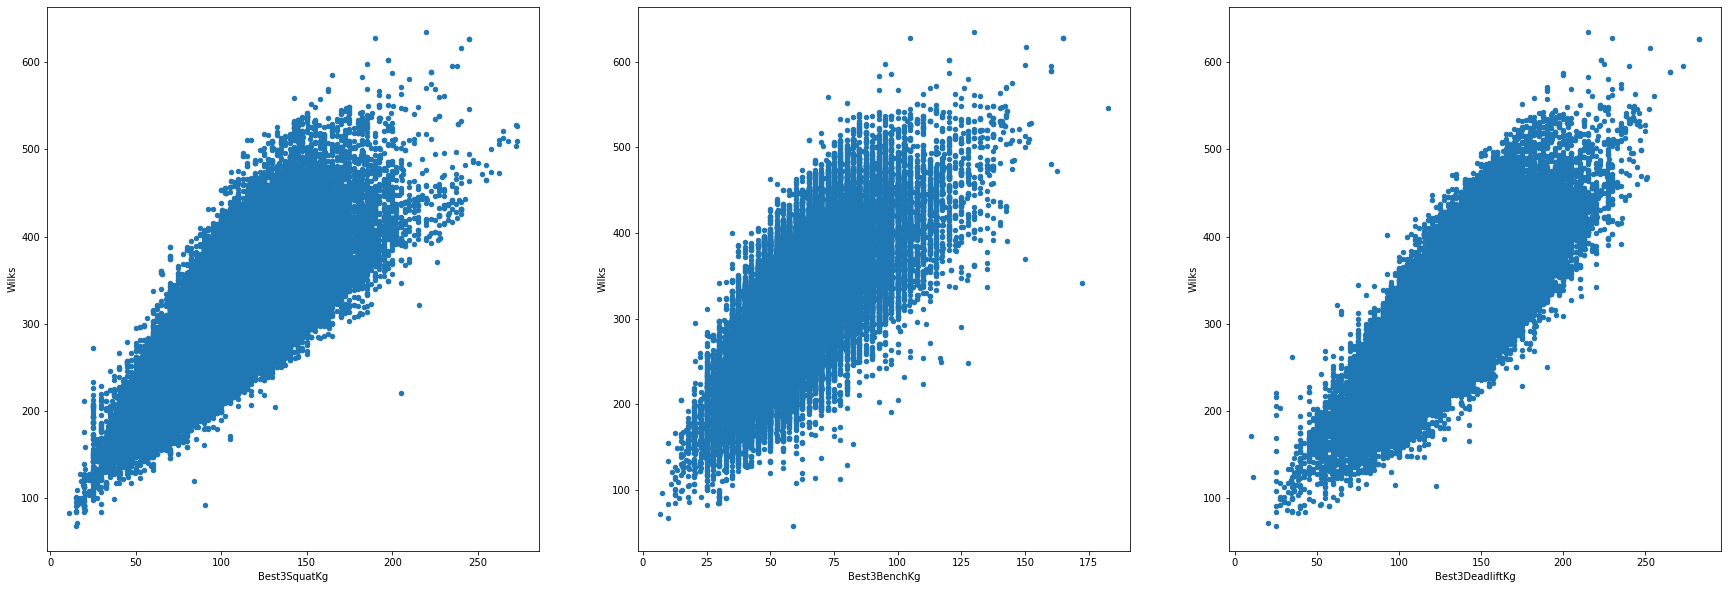

In [37]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (30,10))
female_data.plot(x = "Best3SquatKg", y = "Wilks", kind = "scatter", ax = axes[0])
female_data.plot(x = "Best3BenchKg", y = "Wilks", kind = "scatter", ax = axes[1])
female_data.plot(x = "Best3DeadliftKg", y = "Wilks", kind = "scatter", ax = axes[2])

Now that we have done some analysis on the data shown, we can start to apply regression models to the Squat, Bench, deadlift vs wilks to determine which of the lifts correspond to a higher wilks score. 

In [38]:
columns = ["Best3SquatKg", "Best3BenchKg", "Best3DeadliftKg", "Wilks"]

male_powerlifting = male_data[columns]
female_powerlifting = female_data[columns]

male_powerlifting = male_powerlifting.dropna()
female_powerlifitng = female_powerlifting.dropna()

c:\Users\zeroc\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


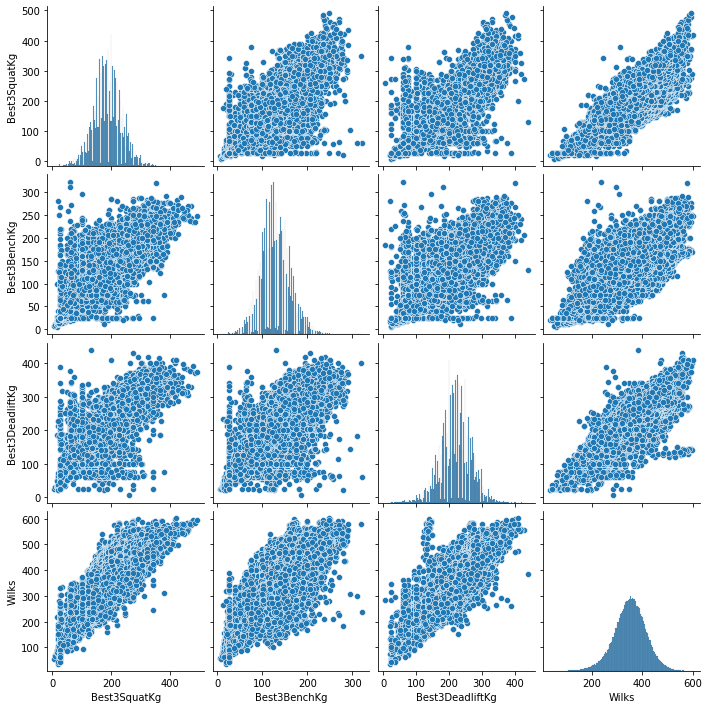

In [39]:
seaborn.pairplot(male_powerlifting)

c:\Users\zeroc\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


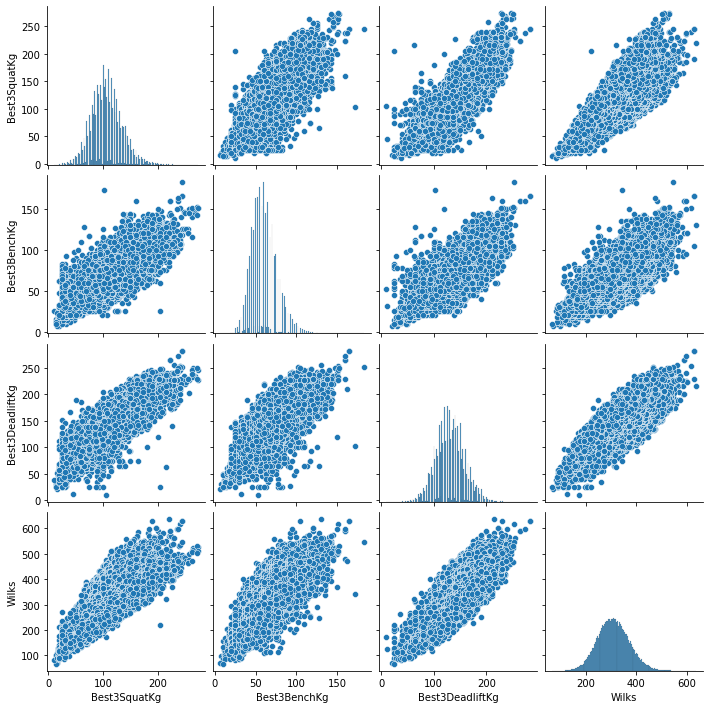

In [40]:
seaborn.pairplot(female_powerlifitng)

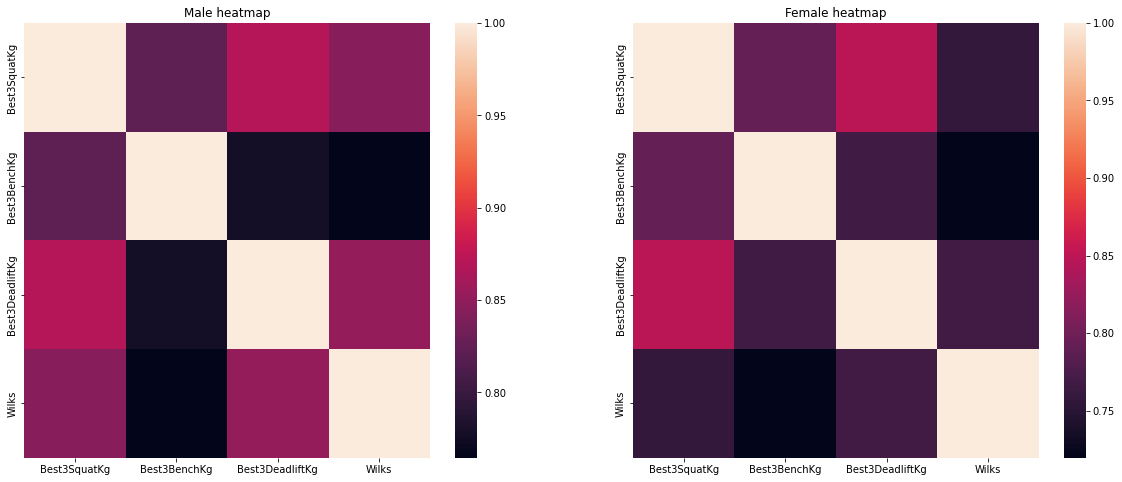

In [41]:
fig, axes = plt.subplots(nrows= 1, ncols= 2, figsize = (20, 8))

seaborn.heatmap(male_powerlifting.corr(), xticklabels= male_powerlifting.columns, yticklabels= male_powerlifting.columns, ax= axes[0])
axes[0].title.set_text("Male heatmap")
seaborn.heatmap(female_powerlifitng.corr(), xticklabels=female_powerlifitng.columns, yticklabels= female_powerlifitng.columns, ax = axes[1])
axes[1].title.set_text("Female heatmap")


In [151]:
X_male = male_powerlifting.Best3SquatKg.values
X_female = female_powerlifitng.Best3SquatKg.values

y_male = male_powerlifting.Wilks.values
y_female = female_powerlifitng.Wilks.values

In [152]:
from sklearn.model_selection import train_test_split

train_X_male, val_X_male, train_y_male, val_y_male = train_test_split(X_male, y_male, random_state= 1)
train_X_female, val_X_female, train_y_female, val_y_female = train_test_split(X_female, y_female, random_state=1)

sorted_val_male_index = np.argsort(val_X_male)
val_X_male = val_X_male[sorted_male_index]
val_y_male = val_y_male[sorted_male_index]

sorted_val_female_index = np.argsort(val_X_female)
val_X_female = val_X_female[sorted_val_female_index]
val_y_female = val_y_female[sorted_val_female_index]


In [153]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

train_X_male_np = train_X_male.reshape(-1,1)
val_X_male_np = val_X_male.reshape(-1,1)
train_y_male_np = train_y_male.reshape(-1,1)
val_y_male_np = val_y_male.reshape(-1,1)

train_X_female_np = train_X_female.reshape(-1,1)
val_X_female_np = val_X_female.reshape(-1,1)
train_y_female_np = train_y_female.reshape(-1,1)
val_y_female_np = val_y_female.reshape(-1,1)

normed_train_X_male = pd.DataFrame(sc.fit_transform(train_X_male_np))
normed_train_X_female = pd.DataFrame(sc.fit_transform(train_X_female_np))
normed_val_X_male = pd.DataFrame(sc.fit_transform(val_X_male_np))
normed_val_X_female = pd.DataFrame(sc.fit_transform(val_X_female_np))

normed_train_y_male = pd.DataFrame(sc.fit_transform(train_y_male_np))
normed_train_y_female = pd.DataFrame(sc.fit_transform(train_y_female_np))
normed_val_y_male = pd.DataFrame(sc.fit_transform(val_y_male_np))
normed_val_y_female = pd.DataFrame(sc.fit_transform(val_y_female_np))

The slope of the male squat vs wilks Linear regression is [[0.84467198]] and the intercept is [5.31933205e-16]
0.416327389601538
The slope of the female squat vs wilks Linear regression is [[0.75596546]] and the intercept is [-2.9230089e-17]
0.5195062669328627


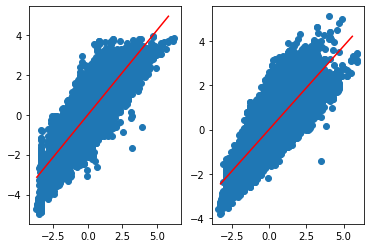

In [154]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae

linear_reg= LinearRegression()
linear_reg.fit(normed_train_X_male, normed_train_y_male)
linear_male_pred = linear_reg.predict(normed_val_X_male)

print('The slope of the male squat vs wilks Linear regression is ' + str(linear_reg.coef_) + " and the intercept is " 
      + str(linear_reg.intercept_))
print(mae(normed_val_y_male, linear_male_pred))

linear_reg = LinearRegression()
linear_reg.fit(normed_train_X_female, normed_train_y_female)
linear_female_pred = linear_reg.predict(normed_val_X_female)

print('The slope of the female squat vs wilks Linear regression is ' + str(linear_reg.coef_) + " and the intercept is " 
      + str(linear_reg.intercept_))
print(mae(normed_val_y_female, linear_female_pred))

fig, axes = plt.subplots(nrows=1, ncols=2)
axes[0].scatter(normed_train_X_male, normed_train_y_male)
axes[0].plot(normed_val_X_male, linear_male_pred, color = "red")
axes[1].scatter(normed_train_X_female, normed_train_y_female)
axes[1].plot(normed_val_X_female, linear_female_pred, color = "red")

The slope of the male bench vs wilks Linear regression is [[0.7650278]] and the intercept is [1.24557047e-15]
0.49849625646494095
The slope of the female bench vs wilks Linear regression is [[0.71819965]] and the intercept is [2.08808751e-16]
0.5482517944945111


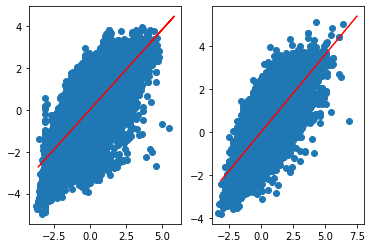

In [155]:
X_male = male_powerlifting.Best3BenchKg.values
X_female = female_powerlifitng.Best3BenchKg.values

y_male = male_powerlifting.Wilks.values
y_female = female_powerlifitng.Wilks.values

train_X_male, val_X_male, train_y_male, val_y_male = train_test_split(X_male, y_male, random_state= 1)
train_X_female, val_X_female, train_y_female, val_y_female = train_test_split(X_female, y_female, random_state=1)

sorted_val_male_index = np.argsort(val_X_male)
val_X_male = val_X_male[sorted_male_index]
val_y_male = val_y_male[sorted_male_index]

sorted_val_female_index = np.argsort(val_X_female)
val_X_female = val_X_female[sorted_val_female_index]
val_y_female = val_y_female[sorted_val_female_index]

sc = StandardScaler()

train_X_male_np = train_X_male.reshape(-1,1)
val_X_male_np = val_X_male.reshape(-1,1)
train_y_male_np = train_y_male.reshape(-1,1)
val_y_male_np = val_y_male.reshape(-1,1)

train_X_female_np = train_X_female.reshape(-1,1)
val_X_female_np = val_X_female.reshape(-1,1)
train_y_female_np = train_y_female.reshape(-1,1)
val_y_female_np = val_y_female.reshape(-1,1)

normed_train_X_male = pd.DataFrame(sc.fit_transform(train_X_male_np))
normed_train_X_female = pd.DataFrame(sc.fit_transform(train_X_female_np))
normed_val_X_male = pd.DataFrame(sc.fit_transform(val_X_male_np))
normed_val_X_female = pd.DataFrame(sc.fit_transform(val_X_female_np))

normed_train_y_male = pd.DataFrame(sc.fit_transform(train_y_male_np))
normed_train_y_female = pd.DataFrame(sc.fit_transform(train_y_female_np))
normed_val_y_male = pd.DataFrame(sc.fit_transform(val_y_male_np))
normed_val_y_female = pd.DataFrame(sc.fit_transform(val_y_female_np))

linear_reg= LinearRegression()
linear_reg.fit(normed_train_X_male, normed_train_y_male)
linear_male_pred = linear_reg.predict(normed_val_X_male)

print('The slope of the male bench vs wilks Linear regression is ' + str(linear_reg.coef_) + " and the intercept is " 
      + str(linear_reg.intercept_))
print(mae(normed_val_y_male, linear_male_pred))

linear_reg.fit(normed_train_X_female, normed_train_y_female)
linear_female_pred = linear_reg.predict(normed_val_X_female)

print('The slope of the female bench vs wilks Linear regression is ' + str(linear_reg.coef_) + " and the intercept is " 
      + str(linear_reg.intercept_))
print(mae(normed_val_y_female, linear_female_pred))

fig, axes = plt.subplots(nrows=1, ncols=2)
axes[0].scatter(normed_train_X_male, normed_train_y_male)
axes[0].plot(normed_val_X_male, linear_male_pred, color = "red")
axes[1].scatter(normed_train_X_female, normed_train_y_female)
axes[1].plot(normed_val_X_female, linear_female_pred, color = "red")

The slope of the male deadlift vs wilks Linear regression is [[0.85261068]] and the intercept is [1.59078086e-15]
0.4032938856360116
The slope of the female deadlift vs wilks Linear regression is [[0.76857224]] and the intercept is [9.39240866e-16]
0.5114522623169817


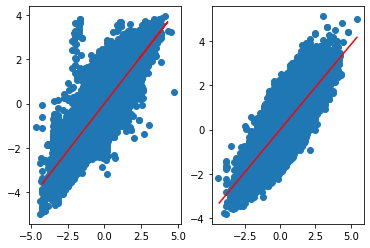

In [156]:
X_male = male_powerlifting.Best3DeadliftKg.values
X_female = female_powerlifitng.Best3DeadliftKg.values

y_male = male_powerlifting.Wilks.values
y_female = female_powerlifitng.Wilks.values

train_X_male, val_X_male, train_y_male, val_y_male = train_test_split(X_male, y_male, random_state= 1)
train_X_female, val_X_female, train_y_female, val_y_female = train_test_split(X_female, y_female, random_state=1)

sorted_val_male_index = np.argsort(val_X_male)
val_X_male = val_X_male[sorted_male_index]
val_y_male = val_y_male[sorted_male_index]

sorted_val_female_index = np.argsort(val_X_female)
val_X_female = val_X_female[sorted_val_female_index]
val_y_female = val_y_female[sorted_val_female_index]

sc = StandardScaler()

train_X_male_np = train_X_male.reshape(-1,1)
val_X_male_np = val_X_male.reshape(-1,1)
train_y_male_np = train_y_male.reshape(-1,1)
val_y_male_np = val_y_male.reshape(-1,1)

train_X_female_np = train_X_female.reshape(-1,1)
val_X_female_np = val_X_female.reshape(-1,1)
train_y_female_np = train_y_female.reshape(-1,1)
val_y_female_np = val_y_female.reshape(-1,1)

normed_train_X_male = pd.DataFrame(sc.fit_transform(train_X_male_np))
normed_train_X_female = pd.DataFrame(sc.fit_transform(train_X_female_np))
normed_val_X_male = pd.DataFrame(sc.fit_transform(val_X_male_np))
normed_val_X_female = pd.DataFrame(sc.fit_transform(val_X_female_np))

normed_train_y_male = pd.DataFrame(sc.fit_transform(train_y_male_np))
normed_train_y_female = pd.DataFrame(sc.fit_transform(train_y_female_np))
normed_val_y_male = pd.DataFrame(sc.fit_transform(val_y_male_np))
normed_val_y_female = pd.DataFrame(sc.fit_transform(val_y_female_np))

linear_reg= LinearRegression()
linear_reg.fit(normed_train_X_male, normed_train_y_male)
linear_male_pred = linear_reg.predict(normed_val_X_male)

print('The slope of the male deadlift vs wilks Linear regression is ' + str(linear_reg.coef_) + " and the intercept is " 
      + str(linear_reg.intercept_))
print(mae(normed_val_y_male, linear_male_pred))

linear_reg.fit(normed_train_X_female, normed_train_y_female)
linear_female_pred = linear_reg.predict(normed_val_X_female)

print('The slope of the female deadlift vs wilks Linear regression is ' + str(linear_reg.coef_) + " and the intercept is " 
      + str(linear_reg.intercept_))
print(mae(normed_val_y_female, linear_female_pred))

fig, axes = plt.subplots(nrows=1, ncols=2)
axes[0].scatter(normed_train_X_male, normed_train_y_male)
axes[0].plot(normed_val_X_male, linear_male_pred, color = "red")
axes[1].scatter(normed_train_X_female, normed_train_y_female)
axes[1].plot(normed_val_X_female, linear_female_pred, color = "red")

And as we can see that the Deadlift actually corresponds with the higher wilks score in all weight classes for raw lifters who competed in SBD events in such a regression model. 

For males, the linear regression line for deadlift vs wilks was 0.85261068 * x + 1.59078086e-15 with a MAE of 0.4032938856360116. 

For the females the LR line was 0.76857224 *x + 9.39240866e-16 with an MAE score of 0.5114522623169817.

Overall it seems as if the linear regression model was a good model for all the datasets despite having a moderate fit. This can be attributed to the fact that there are a lot of data points/outliers to the dataset increasing the MAE score by a lot. 